## 8  Métodos de machine learning de predicción de la diabetes

### Los datos han sido obtenidos de la página: https://www.kaggle.com/johndasilva/diabetes



### Significado de las variables.

#### Pregnancies = Número de embarazos
#### Glucose = Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa
#### BloodPressure = presión arterial diastólica (mm Hg)
#### SkinThickness = espesor del pliegue cutáneo del tríceps (mm)
#### Insulin = insulina sérica de 2 horas (mu U / ml)
#### BMI = índice de masa corporal (peso en kg / (altura en m) ^ 2)
#### DiabetesPedigreeFunction = datos sobre diabetes en familiares
#### Age = Edad (años)
#### Outcome = Variable de clase (0 o 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
nombre_archivo = "diabetes.csv"

In [3]:
path_to_zips = "/home/dsc/Desktop/TFM/DATA/"

In [4]:
dataset = path_to_zips + nombre_archivo

In [5]:
df = pd.read_csv(path_to_zips + nombre_archivo)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
df.count()

Pregnancies                 2000
Glucose                     2000
BloodPressure               2000
SkinThickness               2000
Insulin                     2000
BMI                         2000
DiabetesPedigreeFunction    2000
Age                         2000
Outcome                     2000
dtype: int64

In [8]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Pregnancies


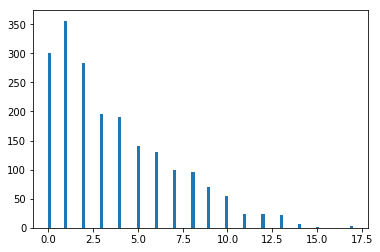

Glucose


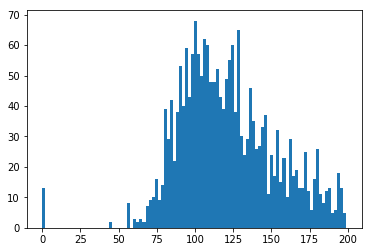

BloodPressure


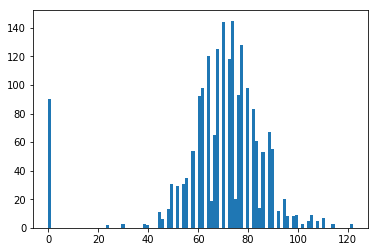

SkinThickness


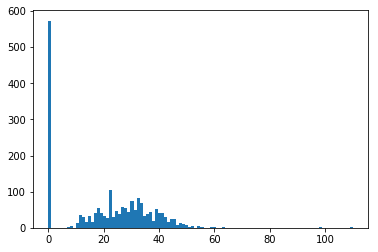

Insulin


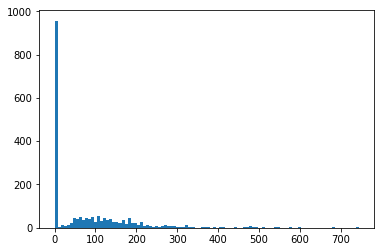

BMI


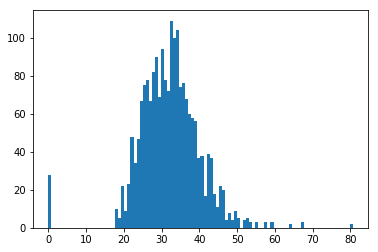

DiabetesPedigreeFunction


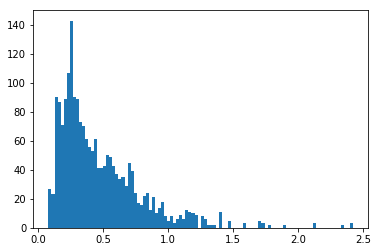

Age


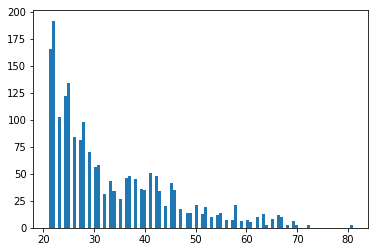

Outcome


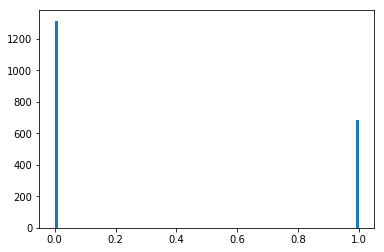

In [10]:
for x in df.columns:
    print(x)
    plt.hist(df[x].dropna().values,bins=100)
    plt.show()

## Train/Test 

In [11]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf=DecisionTreeClassifier(min_samples_leaf = 10)

In [16]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
print (cross_val_score(clf, X, y, cv=10,scoring="accuracy").mean())

0.8499843871096777


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf1=GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=20),
                  param_grid={"min_samples_leaf":np.arange(5,50)})
clf1.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
clf1.best_params_

{'min_samples_leaf': 5}

In [22]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [23]:
dot_data = tree.export_graphviz(clf,out_file=None)

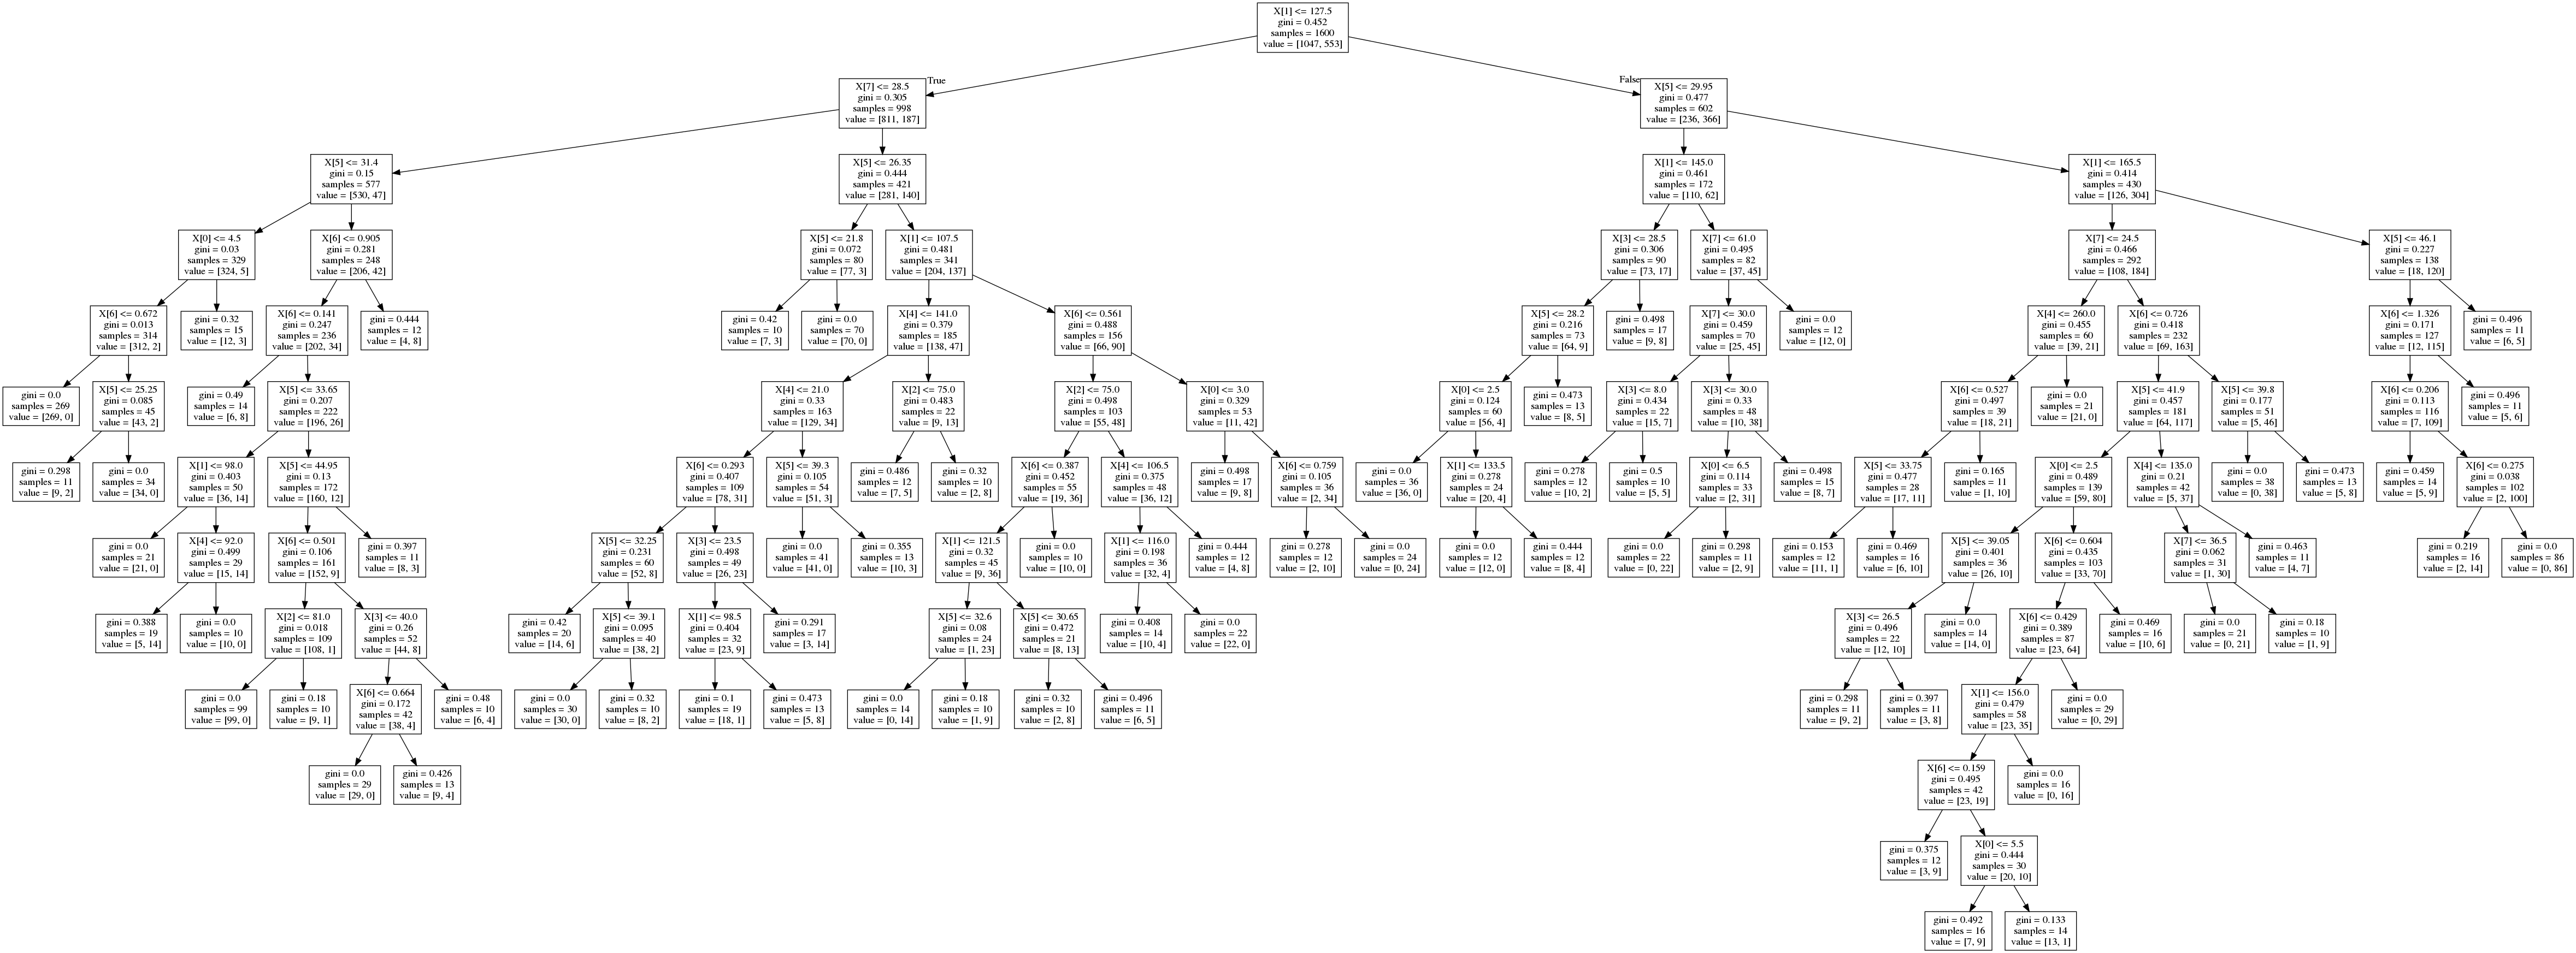

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

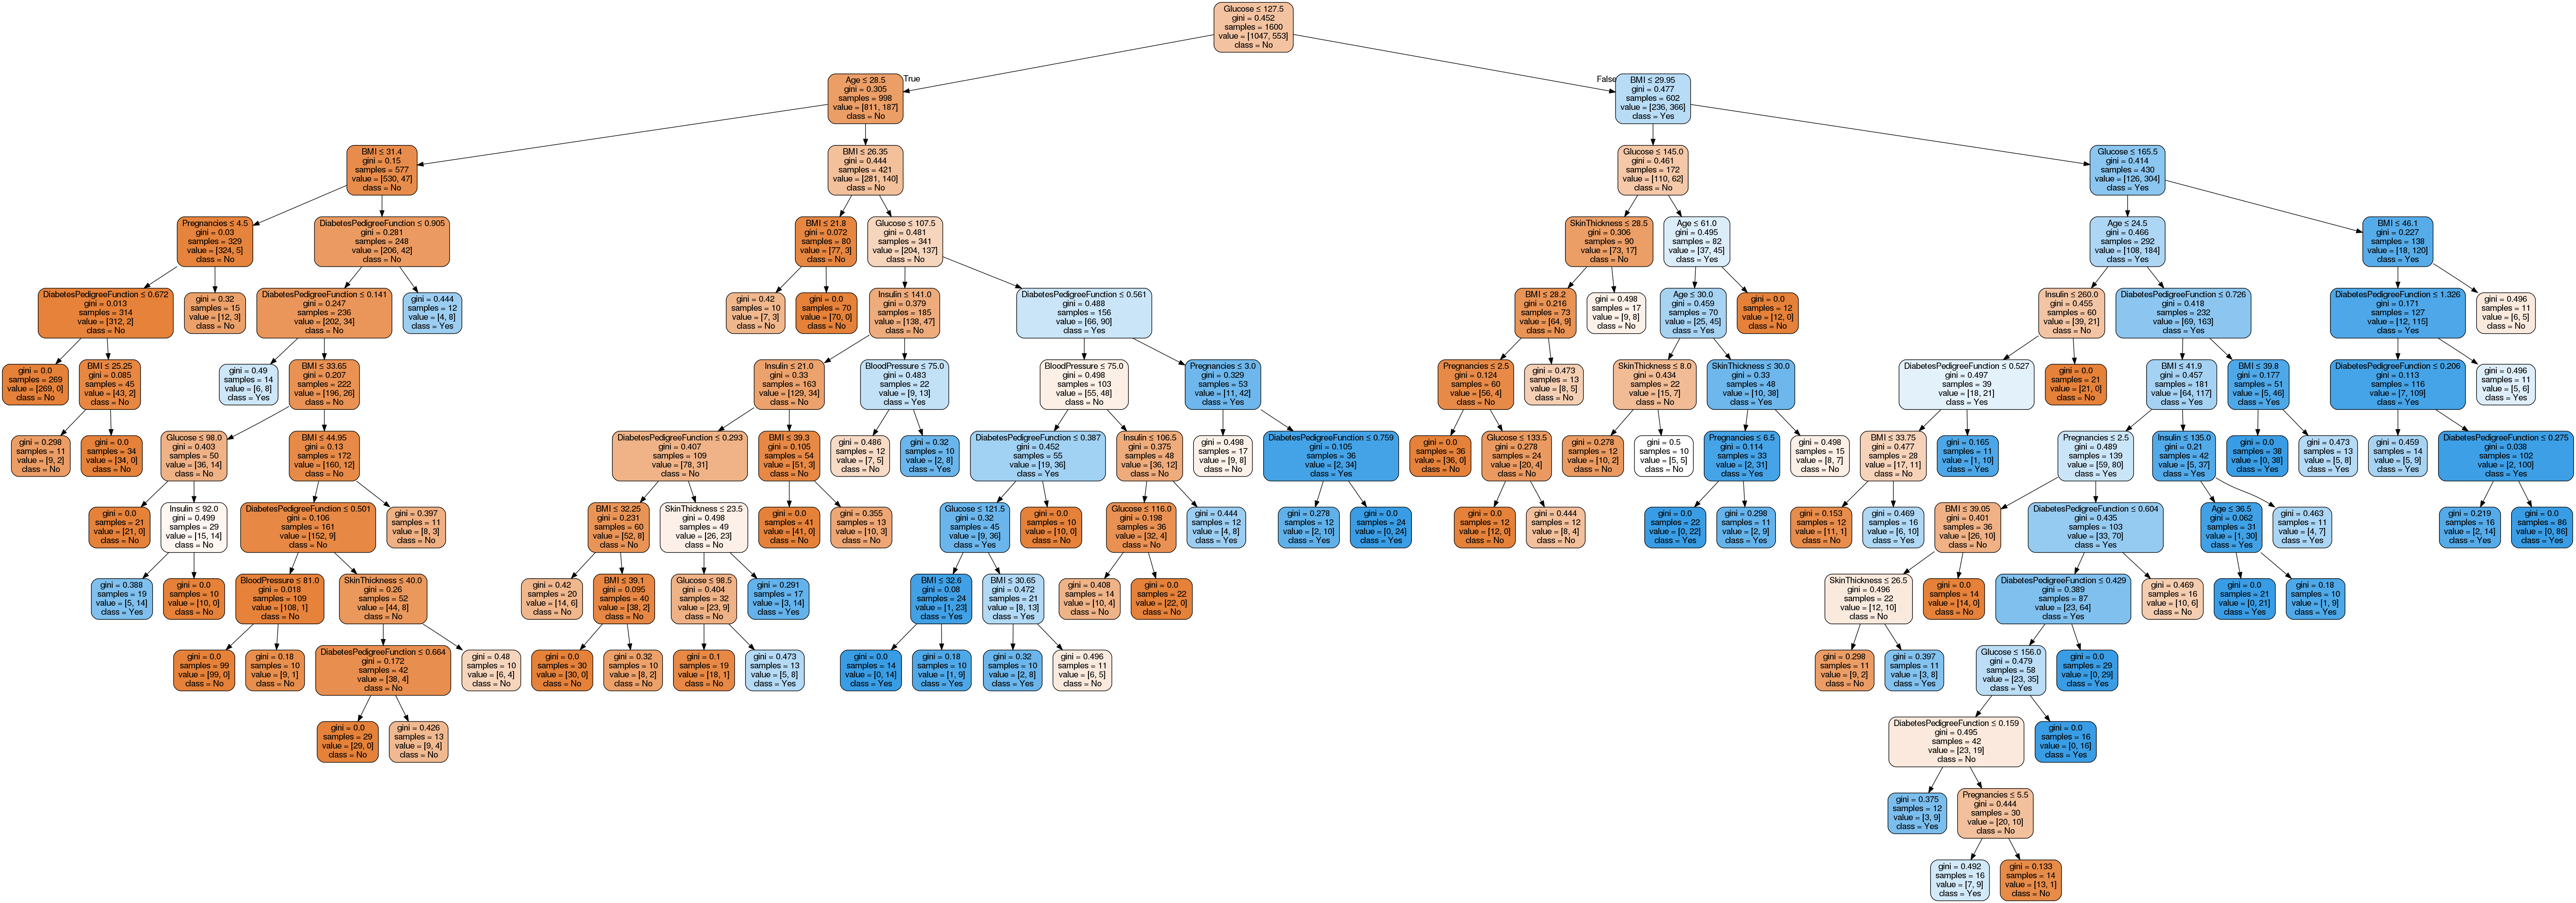

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], 
                         class_names=["No","Yes"], 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [27]:
from ipywidgets import interact

In [28]:
@interact(Pregnancies=8.5 ,Glucose = 100,BloodPressure= 61 ,SkinThickness = 55,
          Insulin = 375 ,BMI = 40.5,DiabetesPedigreeFunction =1.3 ,Age = 41)

def show(Pregnancies,Glucose,BloodPressure,SkinThickness,
         Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    return clf.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,
                         Insulin,BMI,DiabetesPedigreeFunction,Age]])

interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=25.5, min=-8.5), IntSlider(value=100, description='Glucose', max=300, min=-100), IntSlider(value=61, description='BloodPressure', max=183, min=-61), IntSlider(value=55, description='SkinThickness', max=165, min=-55), IntSlider(value=375, description='Insulin', max=1125, min=-375), FloatSlider(value=40.5, description='BMI', max=121.5, min=-40.5), FloatSlider(value=1.3, description='DiabetesPedigreeFunction', max=3.9000000000000004, min=-1.3), IntSlider(value=41, description='Age', max=123, min=-41), Output()), _dom_classes=('widget-interact',))

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rand = RandomForestClassifier(n_estimators=100,max_depth=4)

In [31]:
rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

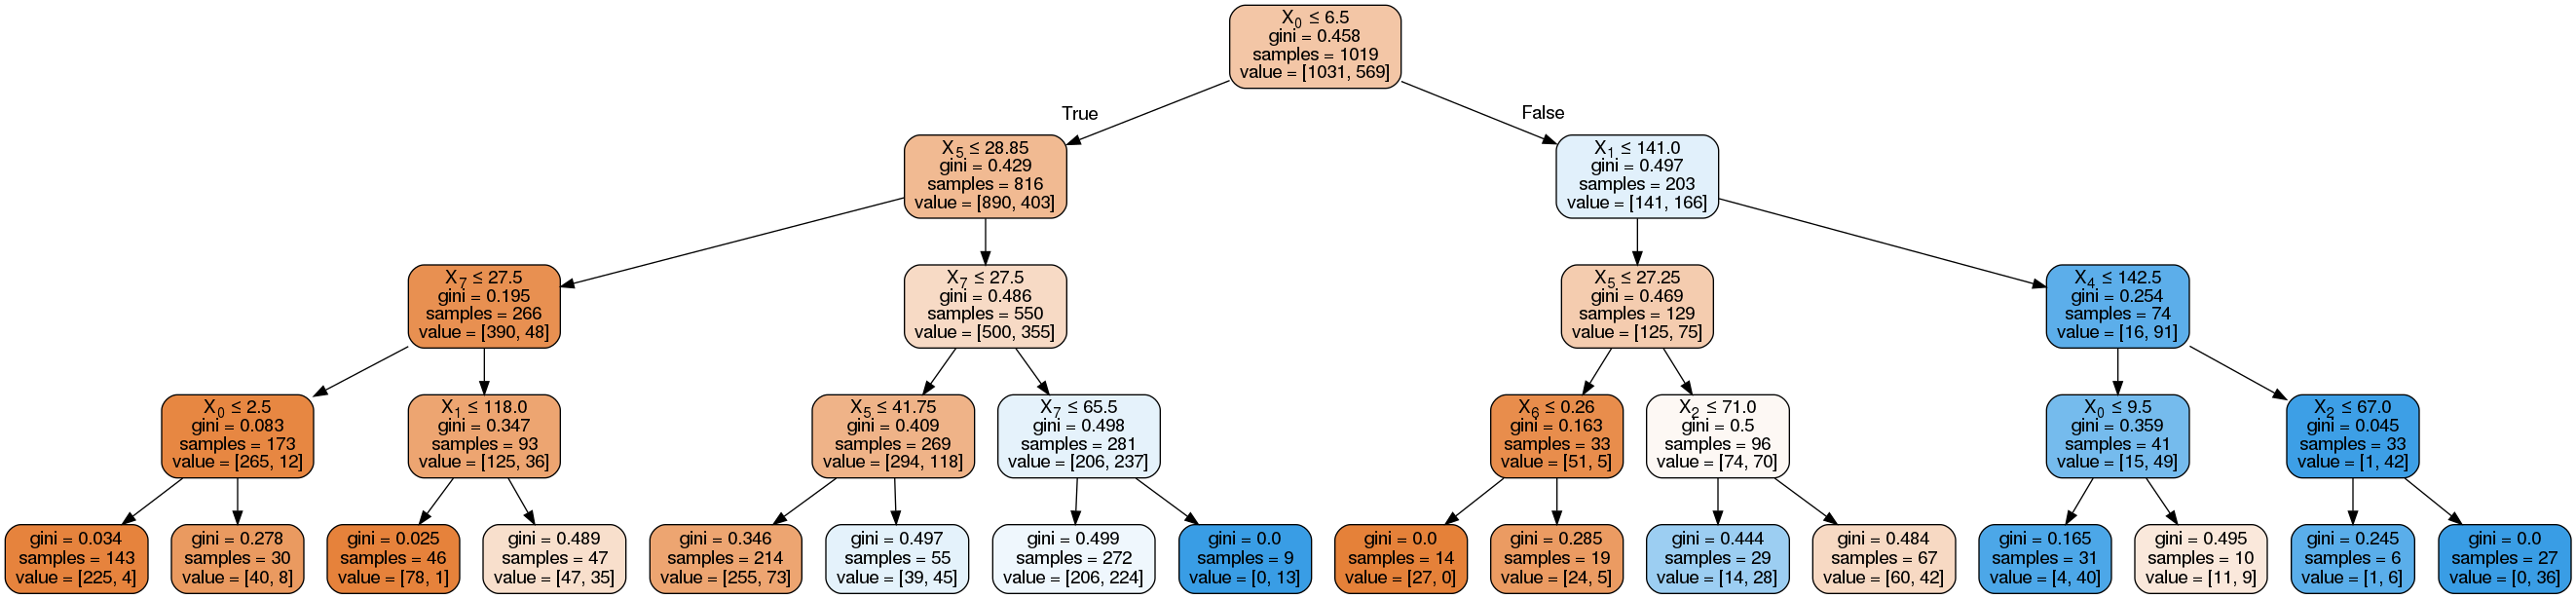

In [33]:
dot_data = tree.export_graphviz(rand.estimators_[5], out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [34]:
print (cross_val_score(rand, X, y, cv=10,scoring="accuracy").mean())

0.8059984874621866


In [35]:
from ipywidgets import interact

In [36]:
@interact(Pregnancies=8.5 ,Glucose = 100,BloodPressure= 61 ,SkinThickness = 55,
          Insulin = 375 ,BMI = 40.5,DiabetesPedigreeFunction =1.3 ,Age = 41)

def show(Pregnancies,Glucose,BloodPressure,SkinThickness,
         Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    return rand.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,
                         Insulin,BMI,DiabetesPedigreeFunction,Age]])

interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=25.5, min=-8.5), IntSlider(value=100, description='Glucose', max=300, min=-100), IntSlider(value=61, description='BloodPressure', max=183, min=-61), IntSlider(value=55, description='SkinThickness', max=165, min=-55), IntSlider(value=375, description='Insulin', max=1125, min=-375), FloatSlider(value=40.5, description='BMI', max=121.5, min=-40.5), FloatSlider(value=1.3, description='DiabetesPedigreeFunction', max=3.9000000000000004, min=-1.3), IntSlider(value=41, description='Age', max=123, min=-41), Output()), _dom_classes=('widget-interact',))

## Regresión

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg=LogisticRegression()

In [39]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
cross_val_score(reg,X,y).mean()

0.7809916363139751

In [41]:
@interact(Pregnancies=8.5 ,Glucose = 100,BloodPressure= 61 ,SkinThickness = 55,
          Insulin = 375 ,BMI = 40.5,DiabetesPedigreeFunction =1.3 ,Age = 41)

def show(Pregnancies,Glucose,BloodPressure,SkinThickness,
         Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    return reg.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,
                         Insulin,BMI,DiabetesPedigreeFunction,Age]])

interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=25.5, min=-8.5), IntSlider(value=100, description='Glucose', max=300, min=-100), IntSlider(value=61, description='BloodPressure', max=183, min=-61), IntSlider(value=55, description='SkinThickness', max=165, min=-55), IntSlider(value=375, description='Insulin', max=1125, min=-375), FloatSlider(value=40.5, description='BMI', max=121.5, min=-40.5), FloatSlider(value=1.3, description='DiabetesPedigreeFunction', max=3.9000000000000004, min=-1.3), IntSlider(value=41, description='Age', max=123, min=-41), Output()), _dom_classes=('widget-interact',))

## Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bclf = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100,oob_score=True)

In [44]:
bclf.fit(X_train,y_train)
bclf.oob_score_

0.770625

In [46]:
@interact(Pregnancies=8.5 ,Glucose = 100,BloodPressure= 61 ,SkinThickness = 55,
          Insulin = 375 ,BMI = 40.5,DiabetesPedigreeFunction =1.3 ,Age = 41)

def show(Pregnancies,Glucose,BloodPressure,SkinThickness,
         Insulin,BMI,DiabetesPedigreeFunction,Age):
    
    return bclf.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,
                         Insulin,BMI,DiabetesPedigreeFunction,Age]])

interactive(children=(FloatSlider(value=8.5, description='Pregnancies', max=25.5, min=-8.5), IntSlider(value=100, description='Glucose', max=300, min=-100), IntSlider(value=61, description='BloodPressure', max=183, min=-61), IntSlider(value=55, description='SkinThickness', max=165, min=-55), IntSlider(value=375, description='Insulin', max=1125, min=-375), FloatSlider(value=40.5, description='BMI', max=121.5, min=-40.5), FloatSlider(value=1.3, description='DiabetesPedigreeFunction', max=3.9000000000000004, min=-1.3), IntSlider(value=41, description='Age', max=123, min=-41), Output()), _dom_classes=('widget-interact',))